# Data Exploration Notebook

### Import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
Floresland_path = '../data/BMS dataset/INNOVIX_Floresland.xlsx'

### Ex-factory volumes

In [3]:
exf_floresland = pd.read_excel(Floresland_path, sheet_name='Ex-Factory volumes')
demand_floresland = pd.read_excel(Floresland_path, sheet_name='Demand volumes')
activity_floresland = pd.read_excel(Floresland_path, sheet_name='Activity')
share_of_voice_floresland = pd.read_excel(Floresland_path, sheet_name='Share of Voice')
new_patient_share_floresland = pd.read_excel(Floresland_path, sheet_name='New patient share')
indication_split_floresland = pd.read_excel(Floresland_path, sheet_name='Indication split')

In [4]:
print("Floresland ex-factory columns:",exf_floresland.columns)
print("Floresland demand columns:",demand_floresland.columns)
print("Floresland activity columns:",activity_floresland.columns)
print("Floresland share of voice columns:",share_of_voice_floresland.columns)
print("Floresland new patient share columns:",new_patient_share_floresland.columns)
print("Floresland indication split columns:",indication_split_floresland.columns)

Floresland ex-factory columns: Index(['Country', 'Product', 'Data type', 'Unit of measure', 'Date', 'Value'], dtype='object')
Floresland demand columns: Index(['Country', 'Product', 'Data type', 'Unit of measure', 'Date', 'Value'], dtype='object')
Floresland activity columns: Index(['Country', 'Data type', 'Product', 'Channel', 'Date', 'Indication',
       'Value'],
      dtype='object')
Floresland share of voice columns: Index(['Country', 'Data type', 'Product', 'Indication', 'Date', 'Value'], dtype='object')
Floresland new patient share columns: Index(['Country', 'Product', 'Data type', 'Indication', 'Sub-Indication',
       'Date', 'Value'],
      dtype='object')
Floresland indication split columns: Index(['Country', 'Product', 'Data type', 'Indication', 'Sub-Indication',
       'Date', 'Value'],
      dtype='object')


In [5]:
print("Floresland info:",exf_floresland.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          82 non-null     object        
 1   Product          82 non-null     object        
 2   Data type        82 non-null     object        
 3   Unit of measure  82 non-null     object        
 4   Date             82 non-null     datetime64[ns]
 5   Value            82 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.0+ KB
Floresland info: None


In [6]:
exf_floresland.head()

,Country,Product,Data type,Unit of measure,Date,Value
0,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-01-01,3503180
1,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-02-01,2611020
2,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-03-01,2952120
3,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-04-01,2995280
4,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660


In [7]:
# Rename the columns for better understanding
exf_floresland.rename(columns={
    'Data type':'Data_type',
    'Unit of measure':'Unit_of_measure'
    }, inplace=True)

exf_floresland.head()

,Country,Product,Data_type,Unit_of_measure,Date,Value
0,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-01-01,3503180
1,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-02-01,2611020
2,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-03-01,2952120
3,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-04-01,2995280
4,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660


### Merge datasets

In [9]:
# Merge the ex-factory and activity_floresland data
# Normalize the Date format in the Ex-factory dataset
exf_floresland['Date'] = pd.to_datetime(exf_floresland['Date'], format='%b-%y')

# Normalize the Date format in the activity_floresland dataset (French month abbreviations)
months_map = {
    'janv.': 'Jan', 'févr.': 'Feb', 'mars': 'Mar', 'avr.': 'Apr',
    'mai': 'May', 'juin': 'Jun', 'juil.': 'Jul', 'août': 'Aug',
    'sept.': 'Sep', 'oct.': 'Oct', 'nov.': 'Nov', 'déc.': 'Dec'
}
activity_floresland['Date'] = activity_floresland['Date'].replace(months_map, regex=True)
activity_floresland['Date'] = pd.to_datetime(activity_floresland['Date'], format='%b-%y')

# Merge the datasets on common columns
merged_activity_floresland = pd.merge(
    exf_floresland,
    activity_floresland,
    on=['Country', 'Product', 'Date'],
    how='inner',  # Use 'inner' join to get rows with matching dates
    suffixes=('_ex_factory', '_activity_floresland')
)

# Display the merged dataset
merged_activity_floresland.head()


,Country,Product,Data_type,Unit_of_measure,Date,Value_ex_factory,Data type,Channel,Indication,Value_activity_floresland
0,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660,Activity,Meetings,Indication 12,0.0
1,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660,Activity,Meetings,Indication 2,0.0
2,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660,Activity,Meetings,Indication 19,1.0
3,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660,Activity,Meetings,Indication 23,0.0
4,Floresland,INNOVIX,Ex-factory volumes,Milligrams,2018-05-01,2929660,Activity,Meetings,Indication 10,0.0


In [ ]:
# Encode categorical variables

columns_to_encode = ['Country', 'Product', 'Data_type', 'Unit_of_measure']

# Label encoding for all categorical columns
label_encoder = LabelEncoder()
for col in columns_to_encode:
    exf_floresland[col + '_encoded'] = label_encoder.fit_transform(exf_floresland[col])


print(exf_floresland.head())


      Country  Product           Data_type Unit_of_measure       Date  \
0  Floresland  INNOVIX  Ex-factory volumes      Milligrams 2018-01-01   
1  Floresland  INNOVIX  Ex-factory volumes      Milligrams 2018-02-01   
2  Floresland  INNOVIX  Ex-factory volumes      Milligrams 2018-03-01   
3  Floresland  INNOVIX  Ex-factory volumes      Milligrams 2018-04-01   
4  Floresland  INNOVIX  Ex-factory volumes      Milligrams 2018-05-01   

     Value  Country_encoded  Product_encoded  Data_type_encoded  \
0  3503180                0                0                  0   
1  2611020                0                0                  0   
2  2952120                0                0                  0   
3  2995280                0                0                  0   
4  2929660                0                0                  0   

   Unit_of_measure_encoded  
0                        0  
1                        0  
2                        0  
3                        0  
4            

In [ ]:
print(exf_floresland.nunique())  # Check unique values per column
print(exf_floresland.isnull().sum())  # Check for missing values


Country                     1
Product                     1
Data_type                   1
Unit_of_measure             1
Date                       82
Value                      82
Country_encoded             1
Product_encoded             1
Data_type_encoded           1
Unit_of_measure_encoded     1
dtype: int64
Country                    0
Product                    0
Data_type                  0
Unit_of_measure            0
Date                       0
Value                      0
Country_encoded            0
Product_encoded            0
Data_type_encoded          0
Unit_of_measure_encoded    0
dtype: int64


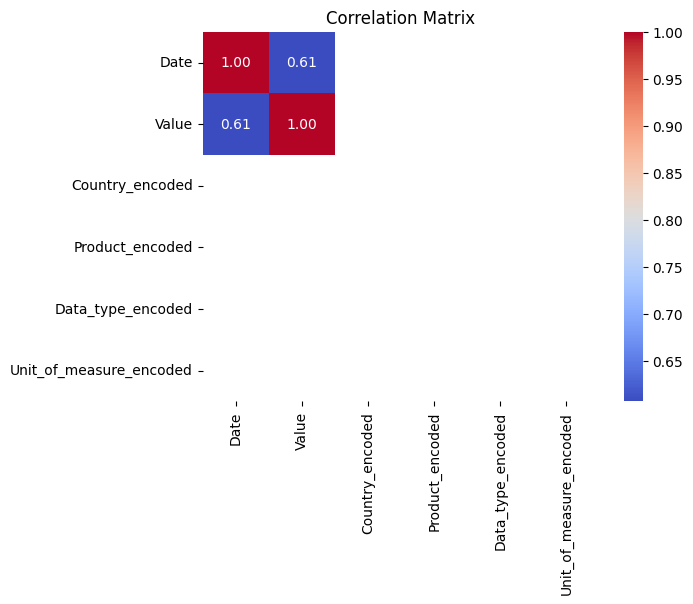

In [ ]:
# Print the correlation matrix
numerical_dataset = exf_floresland.drop(columns=columns_to_encode)
correlation_matrix = numerical_dataset.corr()

# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
